In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/Volumes/BigBox/Python/OZON_The_Loom/Excel_files/Шаблон для обновления цен_25.09.25.xlsx", header=1)

df = df.drop([0, 1]).reset_index(drop=True)

df = df.drop(df.columns[37:43], axis=1).drop(df.columns[23:26], axis=1)

columns_map = {
    "Артикул": "article",
    "SKU": "sku",
    "Название товара": "product_name",
    "Статус": "status",
    "Видимость на OZON": "visibility",
    "На складе Ozon": "stock_ozon",
    "На моих складах": "stock_seller",
    "Объем, л": "volume_l",
    "Объемный вес, кг": "weight_kg",
    "Штрихкод": "barcode",
    "Показы всего": "views",
    "Конверсия из показа в заказ": "conversion",
    "Заказано товаров": "orders",
    "Цена до скидки, руб.": "price_before_discount",
    "Текущая цена (со скидкой), руб.": "price_current",
    "Скидка, %": "discount_pct",
    "Скидка, руб.": "discount_rub",
    "Цена с учетом акции или стратегии, руб.": "price_with_promo",
    "Скидка с учетом акции, %": "discount_promo_pct",
    "Скидка с учетом акции, руб.": "discount_promo_rub",
    "Минимальная цена, руб.": "min_price",
    "Настройка \"Учитывать минимальную цену при автодобавлении в акции\"": "min_price_setting",
    "Осталось дней действия настройки \"Учитывать минимальную цену при автодобавлении в акции\"": "min_price_days_left",
    "Эквайринг": "acquiring",
    "Вознаграждение Ozon, FBO, %": "commission_fbo_pct",
    "Логистика Ozon, минимум, FBO": "logistics_fbo_min",
    "Логистика Ozon, максимум, FBO": "logistics_fbo_max",
    "Доставка до места выдачи, FBO": "delivery_fbo",
    "Вознаграждение Ozon, FBS, %": "commission_fbs_pct",
    "Обработка отправления, минимум FBS": "handling_fbs_min",
    "Обработка отправления, максимум FBS": "handling_fbs_max",
    "Логистика Ozon, минимум, FBS": "logistics_fbs_min",
    "Логистика Ozon, максимум, FBS": "logistics_fbs_max",
    "Доставка до места выдачи, FBS": "delivery_fbs"
}

df = df.rename(columns=columns_map)

int_cols = ["stock_ozon", "stock_seller", "orders", "min_price_days_left"]

float_cols = [
    "volume_l", "weight_kg", "views", "conversion",
    "price_before_discount", "price_current",
    "discount_pct", "discount_rub",
    "price_with_promo", "discount_promo_pct", "discount_promo_rub",
    "min_price", "acquiring",
    "commission_fbo_pct", "logistics_fbo_min", "logistics_fbo_max", "delivery_fbo",
    "commission_fbs_pct", "handling_fbs_min", "handling_fbs_max",
    "logistics_fbs_min", "logistics_fbs_max", "delivery_fbs"
]

for col in int_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")  # безопасный int с NaN

for col in float_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [2]:
top_views = df.groupby("product_name")["views"].sum().sort_values(ascending=False).head(10)

In [3]:
top_views = top_views.reset_index(name="views")

In [4]:
total_orders = df[df["product_name"].isin(top_views["product_name"].tolist())].groupby('product_name')["orders"].sum().reset_index(name="orders").sort_values(by="orders", ascending=False)

/var/folders/9s/gf5r5sm16hg7qm1m86byhk9w0000gn/T/ipykernel_11771/1582280868.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/9s/gf5r5sm16hg7qm1m86byhk9w0000gn/T/ipykernel_11771/1582280868.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


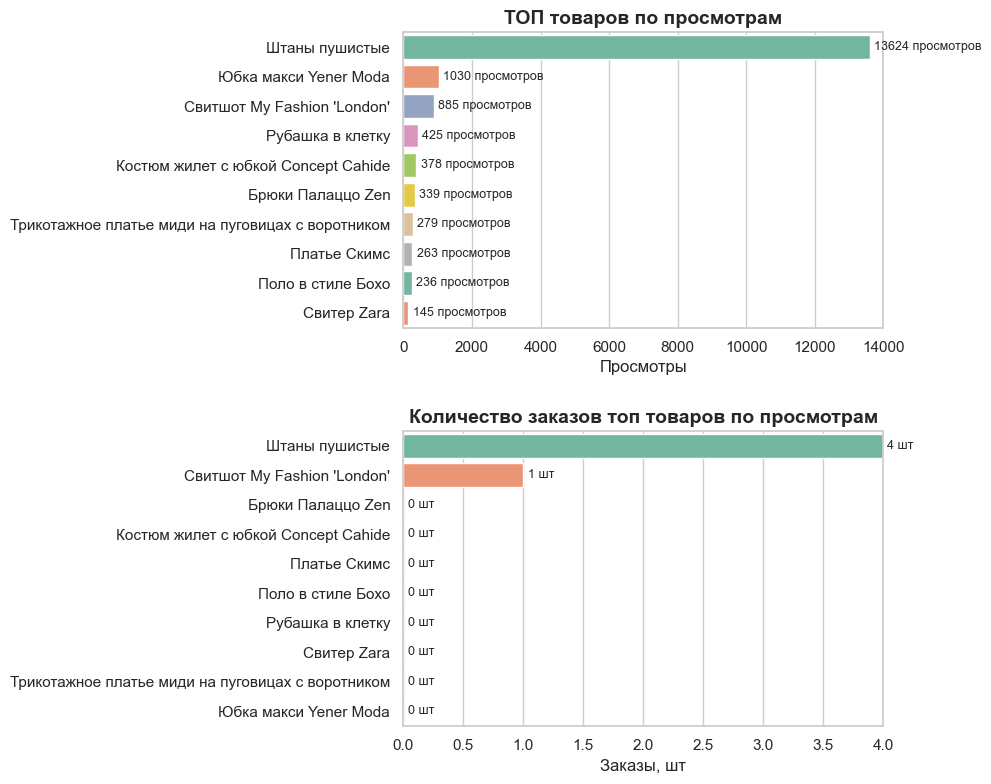

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# стиль
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# верхний график — просмотры
sns.barplot(
    data=top_views,
    x="views", y="product_name",
    ax=ax[0], palette="Set2"
)
ax[0].set_title("ТОП товаров по просмотрам", fontsize=14, fontweight="bold")
ax[0].set_xlabel("Просмотры", fontsize=12)
ax[0].set_ylabel("")
ax[0].set_xlim(0, 14000)   # ограничение оси X

# подписи на барах
for container in ax[0].containers:
    ax[0].bar_label(container, fmt="%.0f просмотров", fontsize=9, padding=3)

# нижний график — заказы
sns.barplot(
    data=total_orders,
    x="orders", y="product_name",
    ax=ax[1], palette="Set2"
)
ax[1].set_title("Количество заказов топ товаров по просмотрам", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Заказы, шт", fontsize=12)
ax[1].set_ylabel("")
ax[1].set_xlim(0, 4.0)     # ограничение оси X

# подписи на барах
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%.0f шт", fontsize=9, padding=3)

plt.tight_layout(h_pad=2)
plt.show()


In [6]:
list(df.columns)

['article',
 'sku',
 'product_name',
 'status',
 'visibility',
 'stock_ozon',
 'stock_seller',
 'volume_l',
 'weight_kg',
 'barcode',
 'views',
 'conversion',
 'orders',
 'price_before_discount',
 'price_current',
 'discount_pct',
 'discount_rub',
 'price_with_promo',
 'discount_promo_pct',
 'discount_promo_rub',
 'min_price',
 'min_price_setting',
 'min_price_days_left',
 'acquiring',
 'commission_fbo_pct',
 'logistics_fbo_min',
 'logistics_fbo_max',
 'delivery_fbo',
 'commission_fbs_pct',
 'handling_fbs_min',
 'handling_fbs_max',
 'logistics_fbs_min',
 'logistics_fbs_max',
 'delivery_fbs']

In [7]:
df["price_with_promo"].median()

2900.0

In [8]:
df["price_with_promo"].min()


1100

In [9]:
df["price_with_promo"].max()

11500

In [20]:
def categorize_price(price):
    if price < 3000:
        return "Дешёвый"
    elif 3000 <= price < 7000:
        return "Средний"
    else:
        return "Дорогой"

df["price_category"] = df["price_with_promo"].apply(categorize_price)

In [47]:
price_and_orders = df.groupby('price_category')['orders'].sum().reset_index(name='orders')

In [ ]:
price_and_orders
cat_order = ["Дешёвый", "Средний", "Дорогой"]

price_and_orders["price_category"] = pd.Categorical(
    price_and_orders["price_category"],
    categories=cat_order,
    ordered=True
)
price_and_orders = price_and_orders.sort_values("price_category")
print(price_and_orders)

  price_category  orders
0        Дешёвый       5
2        Средний       0
1        Дорогой       0


In [62]:
price_and_views = df.groupby("price_category")["views"].mean().reset_index(name='views').sort_values(by='views', ascending=False)

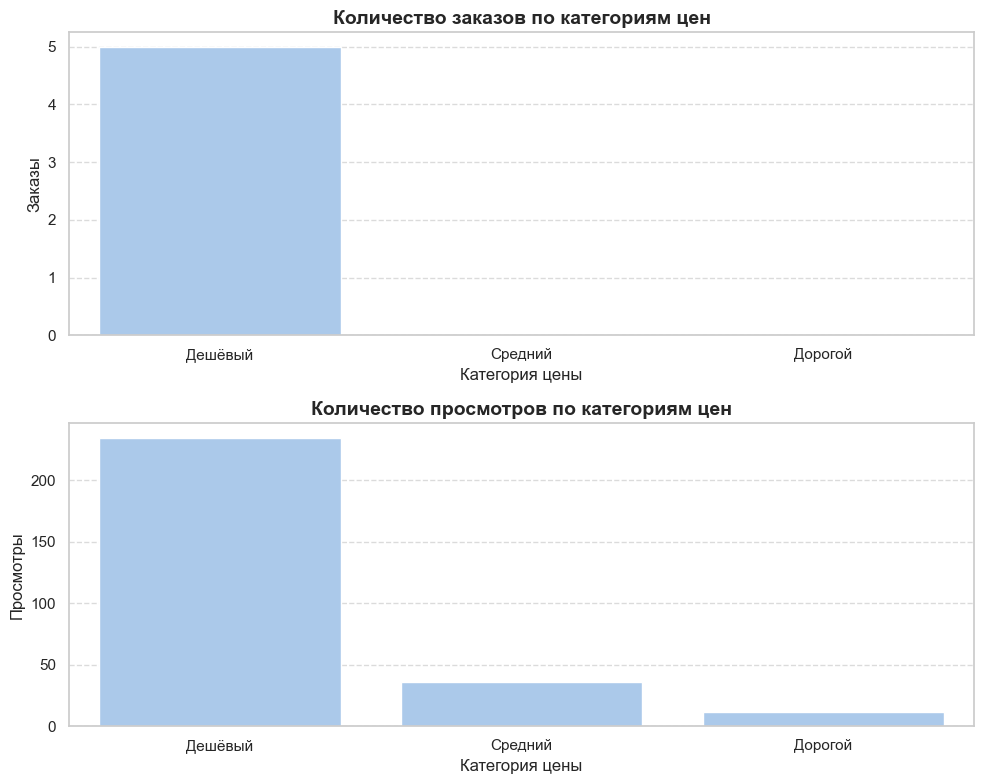

In [63]:
# Задаём стиль
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Создаём 2 графика (по вертикали)
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Первый график: заказы
sns.barplot(data=price_and_orders, x="price_category", y="orders", ax=ax[0])
ax[0].set_title("Количество заказов по категориям цен", fontsize=14, fontweight="bold")
ax[0].set_xlabel("Категория цены", fontsize=12)
ax[0].set_ylabel("Заказы", fontsize=12)

# Второй график: просмотры
sns.barplot(data=price_and_views, x="price_category", y="views", ax=ax[1])
ax[1].set_title("Количество просмотров по категориям цен", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Категория цены", fontsize=12)
ax[1].set_ylabel("Просмотры", fontsize=12)

# Добавляем сетку и сжимаем отступы
for a in ax:
    a.grid(True, axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

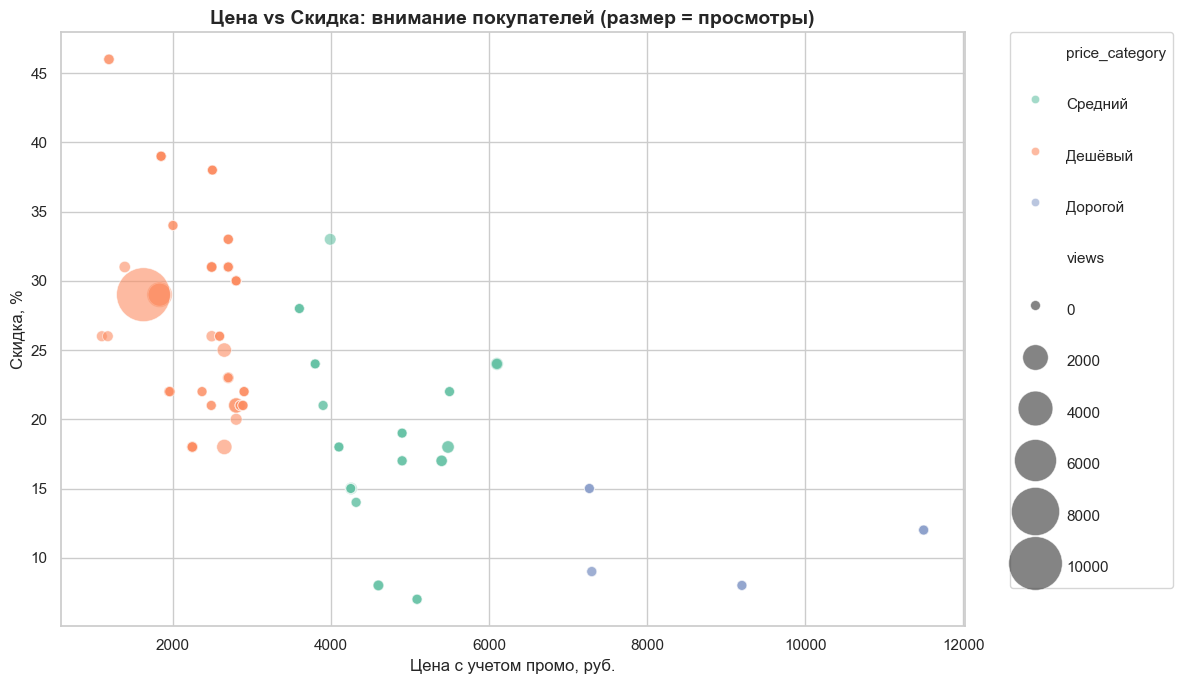

In [57]:
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=df,
    x="price_with_promo", 
    y="discount_pct",
    hue="price_category",   # цвет по категории
    size="views",           # размер по просмотрам
    sizes=(50, 1500),       # делаем кружки заметнее
    alpha=0.6,
    palette="Set2"
)

plt.title("Цена vs Скидка: внимание покупателей (размер = просмотры)", fontsize=14, fontweight="bold")
plt.xlabel("Цена с учетом промо, руб.", fontsize=12)
plt.ylabel("Скидка, %", fontsize=12)

# достаём текущую легенду и правим её
handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles, labels,
    bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.,
    labelspacing=1.5,   # расстояние между пунктами
    handleheight=2.5,   # высота кружочка
    handlelength=2.5    # длина
)

plt.tight_layout()
plt.show()


In [69]:
df2 = df[["product_name", "price_with_promo"]]

In [70]:
df2[df["product_name"] == 'Штаны пушистые']

,product_name,price_with_promo
47,Штаны пушистые,1831
48,Штаны пушистые,1831
49,Штаны пушистые,1627
